In [2]:
import time
import numpy as np
import tkinter as tk
from PIL import ImageTk, Image

np.random.seed(1)
PhotoImage = ImageTk.PhotoImage
UNIT = 100
HEIGHT = 5
WIDTH = 5


class Env(tk.Tk):
    def __init__(self):
        super(Env, self).__init__()
        self.action_space = ['u', 'd', 'l', 'r']
        self.n_actions = len(self.action_space)
        self.title('Q Learning')
        self.geometry('{0}x{1}'.format(HEIGHT * UNIT, HEIGHT * UNIT))
        self.shapes = self.load_images()
        self.canvas = self._build_canvas()
        self.texts = []

    def _build_canvas(self):
        canvas = tk.Canvas(self, bg='white',
                           height=HEIGHT * UNIT,
                           width=WIDTH * UNIT)
        # create grids
        for c in range(0, WIDTH * UNIT, UNIT):  # 0~400 by 80
            x0, y0, x1, y1 = c, 0, c, HEIGHT * UNIT
            canvas.create_line(x0, y0, x1, y1)
        for r in range(0, HEIGHT * UNIT, UNIT):  # 0~400 by 80
            x0, y0, x1, y1 = 0, r, HEIGHT * UNIT, r
            canvas.create_line(x0, y0, x1, y1)

        # add img to canvas
        self.rectangle = canvas.create_image(50, 50, image=self.shapes[0])
        self.triangle1 = canvas.create_image(250, 150, image=self.shapes[1])
        self.triangle2 = canvas.create_image(150, 250, image=self.shapes[1])
        self.circle = canvas.create_image(450, 450, image=self.shapes[2])

        # pack all
        canvas.pack()

        return canvas

    def load_images(self):
        rectangle = PhotoImage(
            Image.open("../img/santa.png").resize((65, 65)))
        triangle = PhotoImage(
            Image.open("../img/tree.png").resize((60, 90)))
        circle = PhotoImage(
            Image.open("../img/house.png").resize((85, 85)))
        
        # for saving time, agent=rectangle=Santa, destination=circle=house, obstacles=triangle=tree

        return rectangle, triangle, circle

    def text_value(self, row, col, contents, action, font='Helvetica', size=10,
                   style='normal', anchor="nw"):
        if action == 0:
            origin_x, origin_y = 7, 42
        elif action == 1:
            origin_x, origin_y = 85, 42
        elif action == 2:
            origin_x, origin_y = 42, 5
        else:
            origin_x, origin_y = 42, 77

        x, y = origin_y + (UNIT * col), origin_x + (UNIT * row)
        font = (font, str(size), style)
        text = self.canvas.create_text(x, y, fill="black", text=contents,
                                       font=font, anchor=anchor)
        return self.texts.append(text)

    def print_value_all(self, q_table):
        for i in self.texts:
            self.canvas.delete(i)
        self.texts.clear()
        for i in range(HEIGHT):
            for j in range(WIDTH):
                for action in range(0, 4):
                    state = [i, j]
                    if str(state) in q_table.keys():
                        temp = q_table[str(state)][action]
                        self.text_value(j, i, round(temp, 2), action)

    def coords_to_state(self, coords):
        x = int((coords[0] - 50) / 100)
        y = int((coords[1] - 50) / 100)
        return [x, y]

    def state_to_coords(self, state):
        x = int(state[0] * 100 + 50)
        y = int(state[1] * 100 + 50)
        return [x, y]

    def reset(self):
        self.update()
        time.sleep(0.5)
        x, y = self.canvas.coords(self.rectangle)
        self.canvas.move(self.rectangle, UNIT / 2 - x, UNIT / 2 - y)
        self.render()
        # return observation
        return self.coords_to_state(self.canvas.coords(self.rectangle))

    def step(self, action):
        state = self.canvas.coords(self.rectangle)
        base_action = np.array([0, 0])
        self.render()

        if action == 0:  # up
            if state[1] > UNIT:
                base_action[1] -= UNIT
        elif action == 1:  # down
            if state[1] < (HEIGHT - 1) * UNIT:
                base_action[1] += UNIT
        elif action == 2:  # left
            if state[0] > UNIT:
                base_action[0] -= UNIT
        elif action == 3:  # right
            if state[0] < (WIDTH - 1) * UNIT:
                base_action[0] += UNIT

        # 移动
        self.canvas.move(self.rectangle, base_action[0], base_action[1])
        self.canvas.tag_raise(self.rectangle)
        next_state = self.canvas.coords(self.rectangle)
        # 判断得分条件
        if next_state == self.canvas.coords(self.circle):
            reward = 100
            done = True
        elif next_state in [self.canvas.coords(self.triangle1),
                            self.canvas.coords(self.triangle2)]:
            reward = -100
            done = True
        else:
            reward = 0
            done = False

        next_state = self.coords_to_state(next_state)
        return next_state, reward, done

    # 渲染环境
    def render(self):
        time.sleep(0.03)
        self.update()


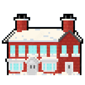

In [5]:
Image.open("../img/house.png").resize((85, 85))

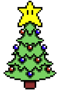

In [7]:
Image.open("../img/tree.png").resize((60, 90))

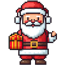

In [9]:
Image.open("../img/santa.png").resize((65, 65))